<a href="https://colab.research.google.com/github/katietx2/katietx2/blob/main/customerclasssification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Survey Data: Purchasing and Demographic Attributes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import io
 
market = pd.read_csv('/content/drive/My Drive/market.csv')
print(market)

          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0          0        1985  Graduation        Married  70951.0        0   
1          1        1961  Graduation         Single  57091.0        0   
2          9        1975      Master         Single  46098.0        1   
3         13        1947         PhD          Widow  25358.0        0   
4         17        1971         PhD        Married  60491.0        0   
...      ...         ...         ...            ...      ...      ...   
9996   18958        1961       Basic        Married  28249.0        0   
9997   18959        1982  Graduation        Married  79908.0        0   
9998   18960        1995  Graduation         Single  34824.0        0   
9999   18961        1979  Graduation       Together  90300.0        0   
10000  18962        1971      Master         Single  33316.0        1   

       Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0             0    4/5/2013       66       239  .

# Feature Statistics and Data Exploration

Education Categorical Variable

In [ ]:
print('is na count '+ str(market['Education'].isna().sum()))
print('\n')
print('value counts '+str(market['Education'].value_counts ()))

is na count 0


value counts Graduation    5005
PhD           2176
Master        1670
2n Cycle       907
Basic          243
Name: Education, dtype: int64


Marital Status Categorical Variable

In [ ]:
print('is na count '+ str(market['Marital_Status'].isna().sum()))
print('\n')
print('value counts '+str(market['Marital_Status'].value_counts ()))

is na count 0


value counts Married     3884
Together    2612
Single      2166
Divorced    1000
Widow        339
Name: Marital_Status, dtype: int64


In [ ]:
market['Dt_Customer']=pd.to_datetime(market['Dt_Customer'])

In [ ]:
market.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

# Distribution of Continuous Variables


In [ ]:
import numpy as np
import pandas as pd 

def getPercentile(df):
  result = pd.DataFrame()
  for name in df:
    missing = df[name].isna().sum()
    
    #df[name]/df[name]? for volume: volume/volume? 
    p1 = df[name].quantile(.01)
    p5 = df[name].quantile(.05)
    p10 = df[name].quantile(.1)
    p90 = df[name].quantile(.9)
    p95 = df[name].quantile(.95)
    p99 = df[name].quantile(.99)
    median = np.mean(df[name])
    mean = np.median(df[name])
    sd = np.std(df[name])
    data = [[name,p1,p5,p10,p90,p95,p99,median,mean,sd, missing]]
    temp = pd.DataFrame(data, columns = ['Attribute Name','P1','P5', 'P10','P90','P95','P99','Median','Mean','STD', 'missing'])
    result = result.append(temp)
  return result



In [ ]:
orig_data=getPercentile(market.drop(['Education', 'Marital_Status','Dt_Customer'], axis=1))
orig_data

,Attribute Name,P1,P5,P10,P90,P95,P99,Median,Mean,STD,missing
0,ID,521.0,2544.0,4967.0,17962.0,18462.0,18862.0,12956.420458,13962.0,4680.623764,0
0,Year_Birth,1945.0,1949.0,1952.0,1984.0,1988.0,1992.0,1968.807719,1970.0,12.084243,0
0,Income,7500.0,18929.0,23976.0,79801.2,84219.0,94871.0,52090.661312,NaN,24136.791557,104
0,Kidhome,0.0,0.0,0.0,1.0,1.0,2.0,0.447055,0.0,0.536650,0
0,Teenhome,0.0,0.0,0.0,1.0,1.0,2.0,0.501250,0.0,0.543502,0
0,Recency,0.0,4.0,9.0,89.0,94.0,98.0,49.022598,49.0,28.916941,0
0,MntWines,1.0,3.0,6.0,817.0,1000.0,1285.0,301.970403,173.0,335.204882,0
0,MntFruits,0.0,0.0,0.0,83.0,122.0,172.0,26.095990,8.0,39.671557,0
0,MntMeatProducts,2.0,4.0,7.0,499.0,687.0,915.0,166.658634,65.0,225.419572,0
0,MntFishProducts,0.0,0.0,0.0,123.0,173.0,227.0,37.765023,12.0,55.339701,0


In [ ]:
orig_data.to_csv('original_continuous.csv')

In [ ]:
market.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,10001.0,12956.420458,4680.857790,0.0,11462.0,13962.0,16462.0,18962.0
Year_Birth,10001.0,1968.807719,12.084847,1893.0,1959.0,1970.0,1977.0,1996.0
Income,9897.0,52090.661312,24138.011049,1730.0,34968.0,51287.0,68462.0,666666.0
Kidhome,10001.0,0.447055,0.536676,0.0,0.0,0.0,1.0,2.0
Teenhome,10001.0,0.501250,0.543529,0.0,0.0,0.0,1.0,2.0
Recency,10001.0,49.022598,28.918387,0.0,24.0,49.0,74.0,99.0
MntWines,10001.0,301.970403,335.221641,0.0,23.0,173.0,502.0,1493.0
MntFruits,10001.0,26.095990,39.673540,0.0,1.0,8.0,32.0,199.0
MntMeatProducts,10001.0,166.658634,225.430843,0.0,15.0,65.0,232.0,1725.0
MntFishProducts,10001.0,37.765023,55.342468,0.0,3.0,12.0,50.0,259.0


#Feature Engineering and Encoding


Creating total spent variable to combine types of purchases, transforming kid_home variable from number of children(continuous) to if the household has children at all (binary). 

In [ ]:
#encoding kid variable
market['Kid_home_encoded']=np.where(market['Kidhome']>0, 1, 0)
# Multiple categorical columns
categorical_cols = ['Marital_Status', 'Education']
market=pd.get_dummies(market, columns=categorical_cols)
market.dtypes

ID                                  int64
Year_Birth                          int64
Income                            float64
Kidhome                             int64
Teenhome                            int64
Dt_Customer                datetime64[ns]
Recency                             int64
MntWines                            int64
MntFruits                           int64
MntMeatProducts                     int64
MntFishProducts                     int64
MntSweetProducts                    int64
MntGoldProds                        int64
NumDealsPurchases                   int64
NumWebPurchases                     int64
NumCatalogPurchases                 int64
NumStorePurchases                   int64
NumWebVisitsMonth                   int64
AcceptedCmp3                        int64
AcceptedCmp4                        int64
AcceptedCmp5                        int64
AcceptedCmp1                        int64
AcceptedCmp2                        int64
Complain                          

In [ ]:
# number of households with children 
market['Kid_home_encoded'].sum()

4267

In [ ]:
#Encode Categorical
#cleanup_nums = {"Education":{"Graduation": 1, "Basic": 2, "Master":3, "2n Cycle": 4, "PhD": 5},"Marital_Status":{"Married": 1, "Together": 2, "Single":3, "Divorced": 4, "Widow":5}}
#market = market.replace(cleanup_nums)
#market

In [ ]:
#Total # purchases 
market['total_spent']=market['MntWines']+market['MntMeatProducts']+market['MntSweetProducts']+market['MntGoldProds']
#Total Visits  
market['total_purch']=market['NumDealsPurchases']+market['NumWebPurchases']+market['NumCatalogPurchases']+market['NumStorePurchases']

In [ ]:
market['total_spent'].groupby(market['Kid_home_encoded']).mean()

Kid_home_encoded
0    806.952040
1    179.665573
Name: total_spent, dtype: float64

In [ ]:
market.dtypes

ID                                  int64
Year_Birth                          int64
Income                            float64
Kidhome                             int64
Teenhome                            int64
Dt_Customer                datetime64[ns]
Recency                             int64
MntWines                            int64
MntFruits                           int64
MntMeatProducts                     int64
MntFishProducts                     int64
MntSweetProducts                    int64
MntGoldProds                        int64
NumDealsPurchases                   int64
NumWebPurchases                     int64
NumCatalogPurchases                 int64
NumStorePurchases                   int64
NumWebVisitsMonth                   int64
AcceptedCmp3                        int64
AcceptedCmp4                        int64
AcceptedCmp5                        int64
AcceptedCmp1                        int64
AcceptedCmp2                        int64
Complain                          

In [ ]:
dataset=market

NameError: ignored

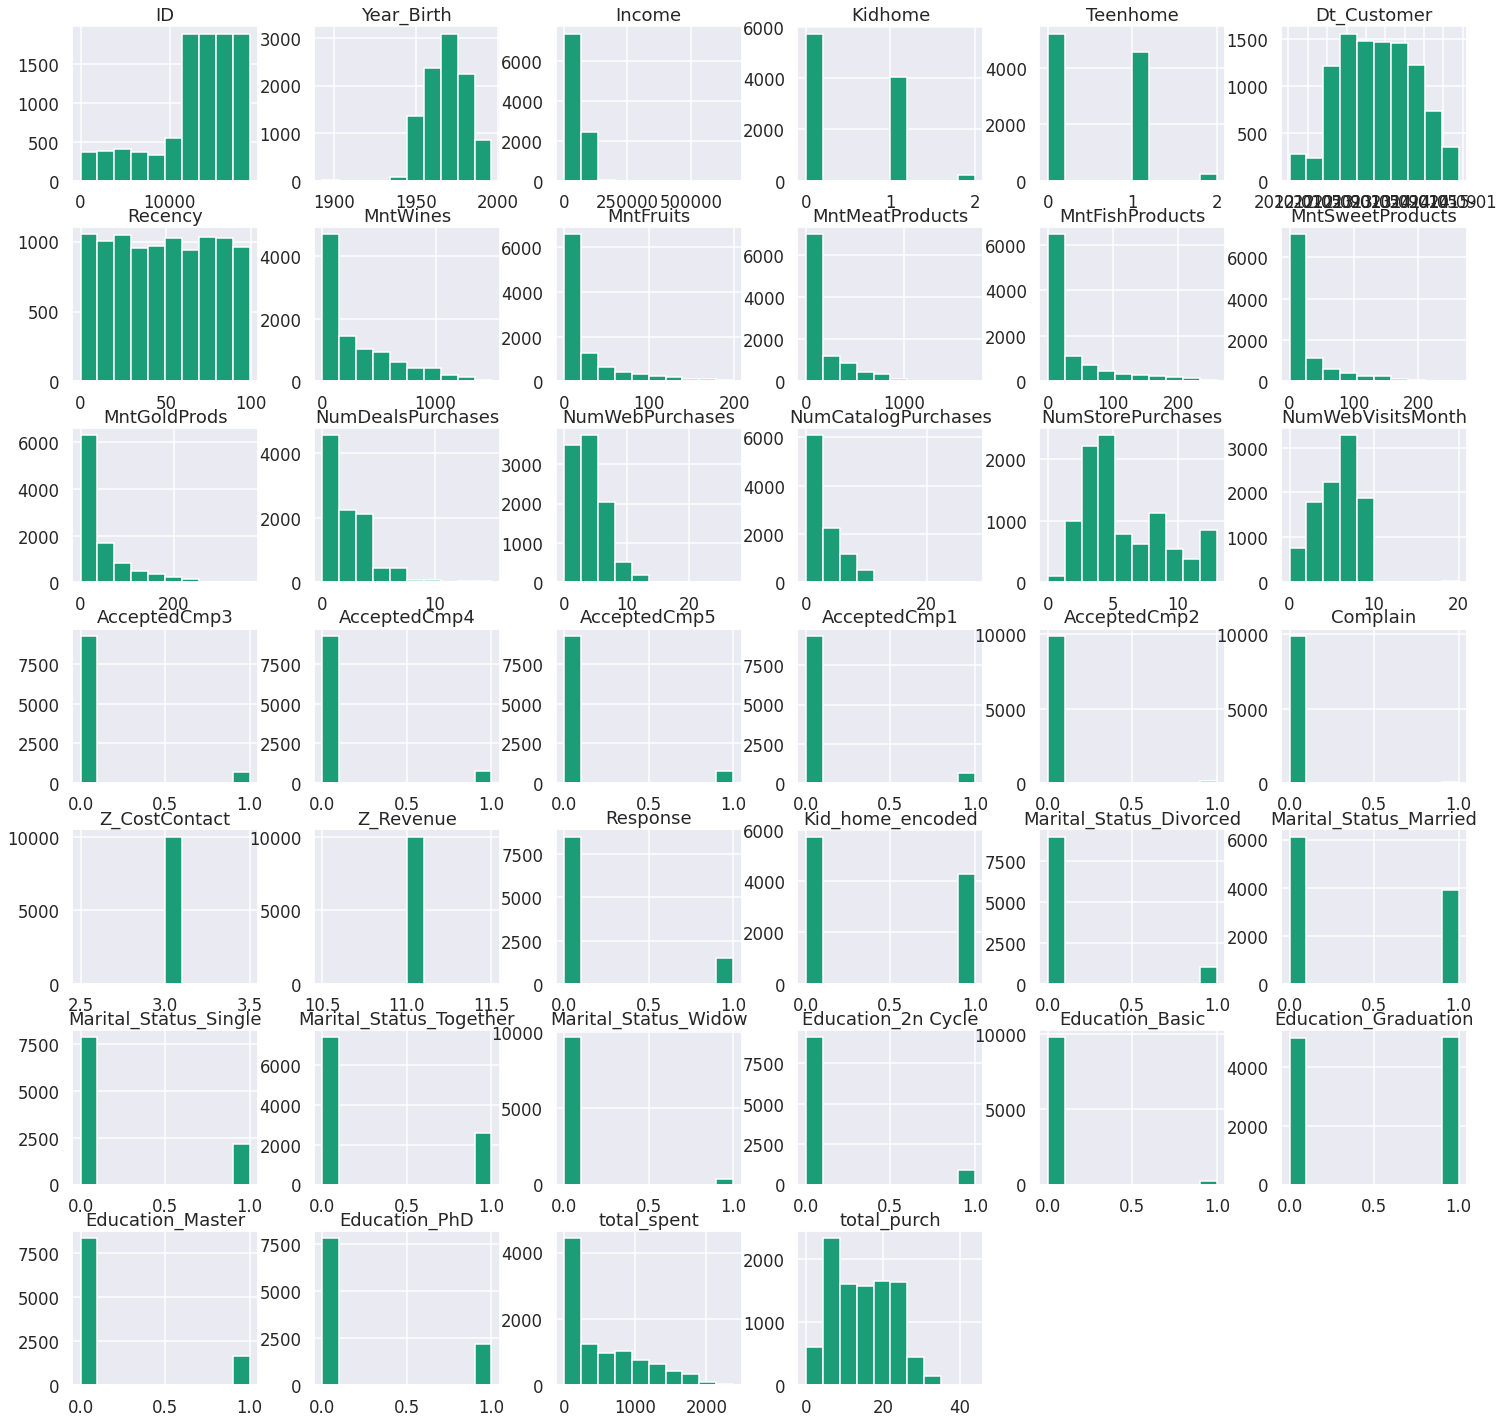

In [ ]:
# histograms of the variables
dataset.hist(figsize= (25,25))
pyplot.show()

# Test Train Split

This is also run in xgboost, but placing here in case we need to run it outside of the model

In [ ]:
from sklearn.model_selection import train_test_split
# Making train and test sets for both X and y
X = market[['Year_Birth', 'Income', 'Teenhome','Recency','MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'total_spent', 'total_purch', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single','Marital_Status_Together', 'Marital_Status_Widow', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD']]
y = market['Kid_home_encoded'] # Target vector in pd.Series format

# Making train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


# XGBoost Classification Model


In [ ]:
import pandas as pd
from xgboost import XGBClassifier

In [ ]:
#try with excluding missing values for inc- for XGBoost gives same results, so just use 'Income', not 'Income1' 
#market['Income1']=market['Income'].dropna()

Accuracy:  0.94653

ROC Curve


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


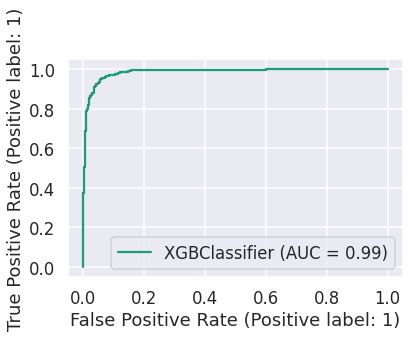

In [ ]:
# Import libraries with standard conventions
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

X = market[['Year_Birth', 'Income', 'Teenhome','Recency','MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'total_spent', 'total_purch', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single','Marital_Status_Together', 'Marital_Status_Widow', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD']]
y = market['Kid_home_encoded'] # Target vector in pd.Series format

# Making train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Instantiate an XGBoost object with hyperparameters
xgb_clf= xgb.XGBClassifier(max_depth=3, n_estimators=100, objective='binary:logistic', booster='gbtree', n_jobs=2, random_state=1)

# Train the model with train data sets
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test) # Predictions
y_true = y_test # True values

print("Accuracy: ", np.round(accuracy_score(y_true, y_pred), 5))
print("\nROC Curve")
print(plot_roc_curve(xgb_clf, X_test, y_test))


In [ ]:
from sklearn.metrics import roc_auc_score
print("ROC: ", np.round(roc_auc_score(y_true, y_pred), 5))

ROC:  0.94702


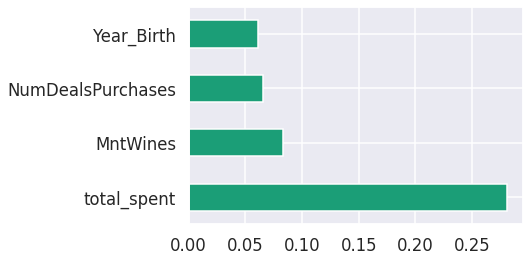

In [ ]:
#Feature importance- but use the SHAP Values instead 
#(pd.Series(xgb_clf.feature_importances_, index=X.columns)
#   .nlargest(4)
#   .plot(kind='barh'))     

Print Test train split Counts

In [ ]:
print('x train \n')
print(X_train['AcceptedCmp1'].count())
print('y train \n')
print(y_train.count())
print('x test \n')
print(X_test['AcceptedCmp1'].count())
print('y test \n')
print(y_test.count())

x train 

8000
y train 

8000
x test 

2001
y test 

2001


(array([4433., 1247.,  960., 1031.,  764.,  657.,  445.,  331.,  101.,
          32.]),
 array([   4. ,  241.1,  478.2,  715.3,  952.4, 1189.5, 1426.6, 1663.7,
        1900.8, 2137.9, 2375. ]),
 <a list of 10 Patch objects>)

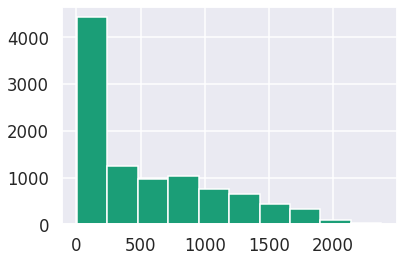

In [ ]:
plt.hist(market['total_spent'])

# XGB-Grid Search


In [ ]:
# XGBoost on Otto dataset, Tune n_estimators and max_depth
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
import numpy
# grid search
model = XGBClassifier()
n_estimators = [50, 100, 150, 200]
max_depth = [4, 8]
learning_rate=[.01,.1,.25]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators), len(learning_rate))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('AUC')
pyplot.savefig('n_estimators_vs_max_depth.png')

[4, 8]
Fitting 10 folds for each of 24 candidates, totalling 240 fits


KeyboardInterrupt: ignored

# Final XGB after Grid Search


Accuracy:  0.9985

ROC Curve


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


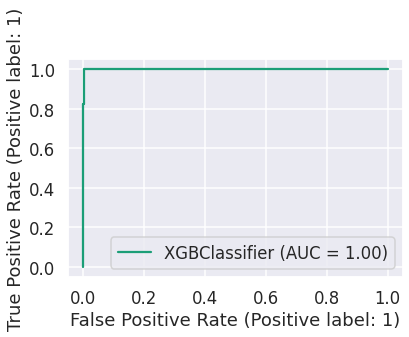

In [ ]:
# Import libraries with standard conventions
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

X = market[['Year_Birth', 'Income', 'Teenhome','Recency','MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'total_spent', 'total_purch', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single','Marital_Status_Together', 'Marital_Status_Widow', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD']]  #'Education_2n Cycle'
y = market['Kid_home_encoded'] # Target vector in pd.Series format

# Making train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Instantiate an XGBoost object with hyperparameters
xgb_clf= xgb.XGBClassifier(max_depth=8, n_estimators=100,learning_rate=.25,objective='binary:logistic', booster='gbtree',n_jobs=2, random_state=1)

# Train the model with train data sets
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test) # Predictions
y_true = y_test # True values

print("Accuracy: ", np.round(accuracy_score(y_true, y_pred), 5))
print("\nROC Curve")
print(plot_roc_curve(xgb_clf, X_test, y_test))

Adjusting max depth for Decision Tree 

Accuracy:  0.94953

ROC Curve


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


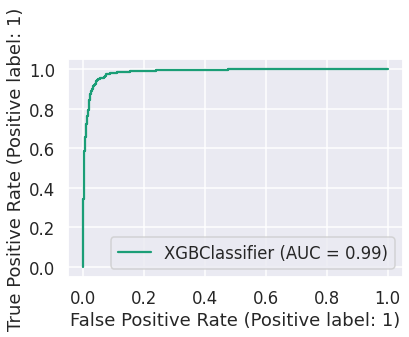

In [ ]:
X = market[['Year_Birth', 'Income', 'Teenhome','Recency','MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'total_spent', 'total_purch', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single','Marital_Status_Together', 'Marital_Status_Widow', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD']]  #'Education_2n Cycle'
y = market['Kid_home_encoded'] # Target vector in pd.Series format

# Making train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Instantiate an XGBoost object with hyperparameters
xgb_clf= xgb.XGBClassifier(max_depth=2, n_estimators=100,learning_rate=.25,objective='binary:logistic', booster='gbtree',n_jobs=2, random_state=1)

# Train the model with train data sets
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test) # Predictions
y_true = y_test # True values

print("Accuracy: ", np.round(accuracy_score(y_true, y_pred), 5))
print("\nROC Curve")
print(plot_roc_curve(xgb_clf, X_test, y_test))

In [ ]:
print("ROC: ", np.round(roc_auc_score(y_true, y_pred), 5))

ROC:  0.99866


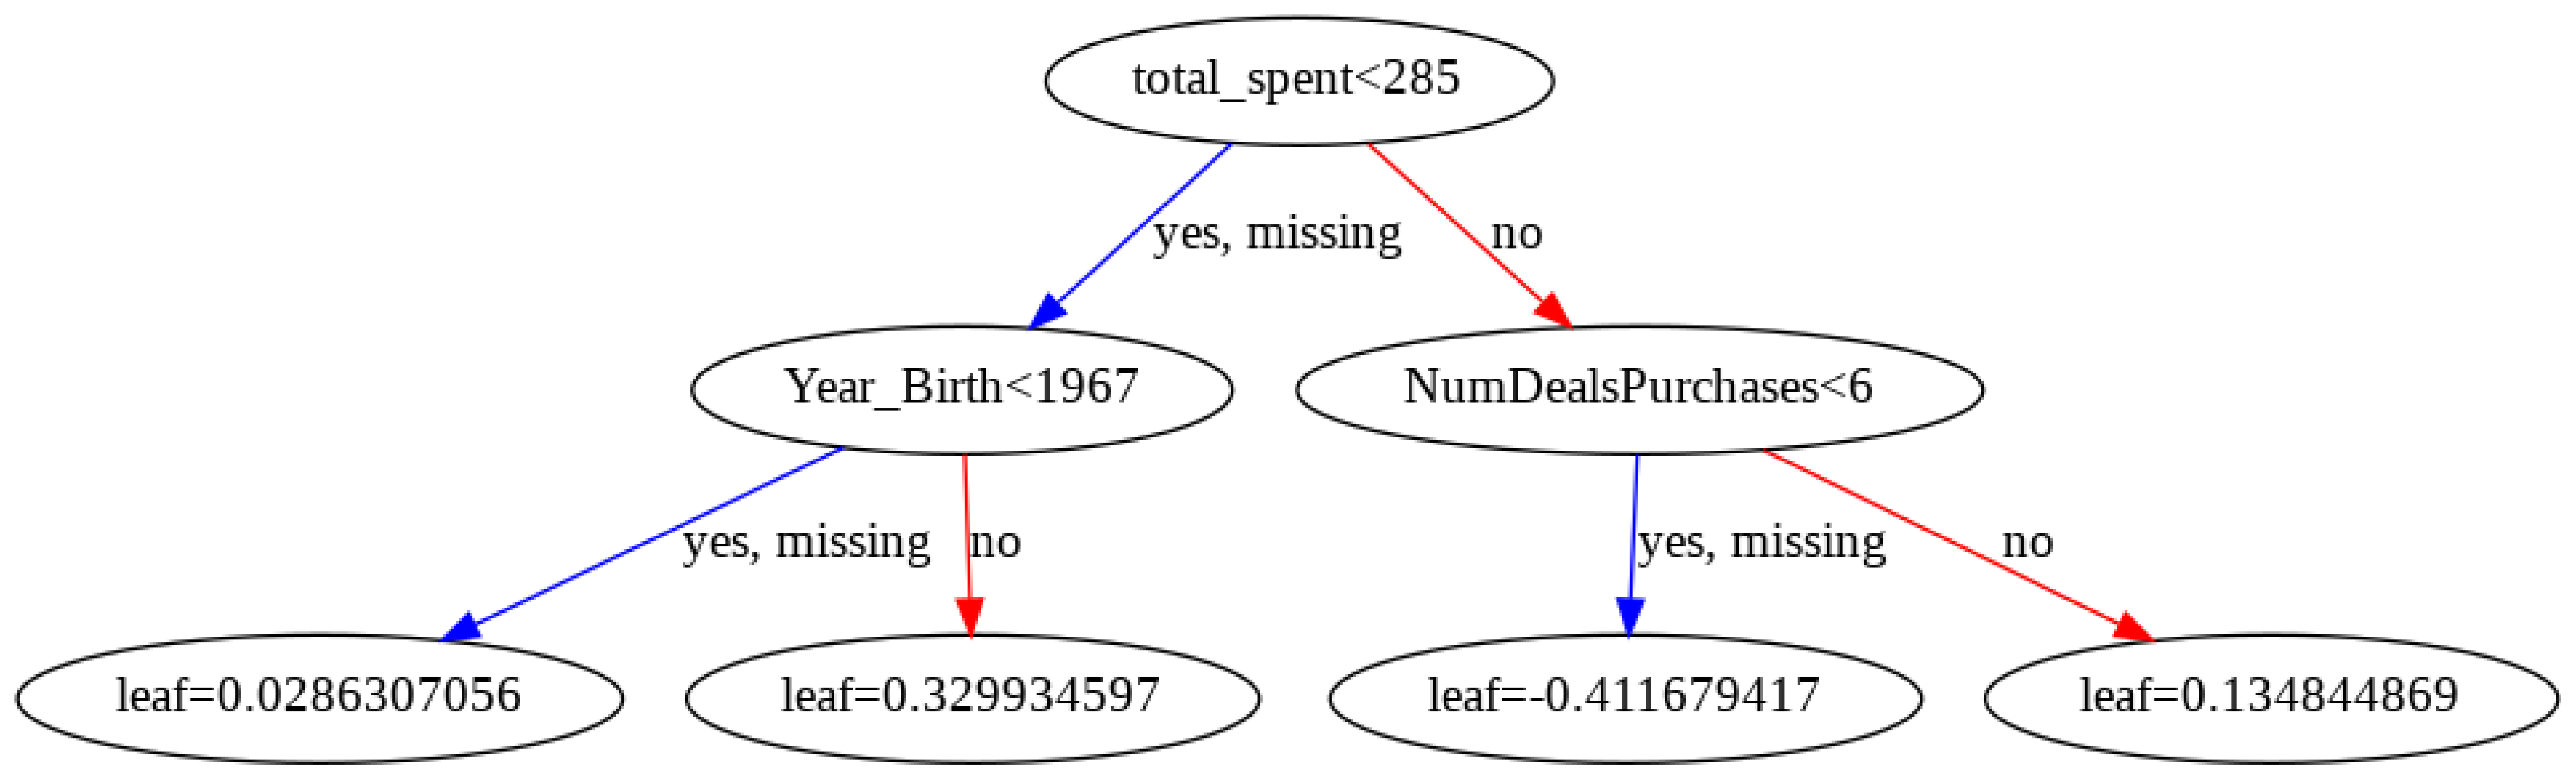

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 80,50

plot_tree(xgb_clf, num_trees=0)

plt.show()

# SHAP Analysis

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 8.9 MB/s 


SHAP summary

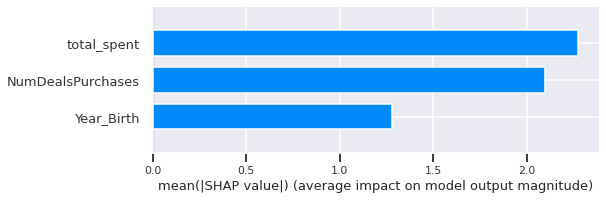

In [ ]:
import shap
shap_values = shap.TreeExplainer(xgb_clf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar",max_display=3)

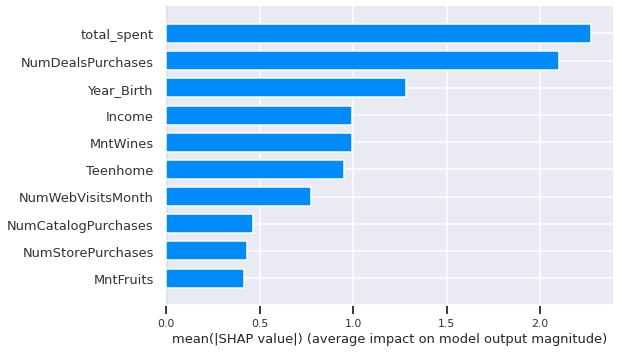

In [ ]:
##Adjusting max_Display for more values 

import shap
shap_values = shap.TreeExplainer(xgb_clf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar",max_display=10)

Shap Dependence Plot

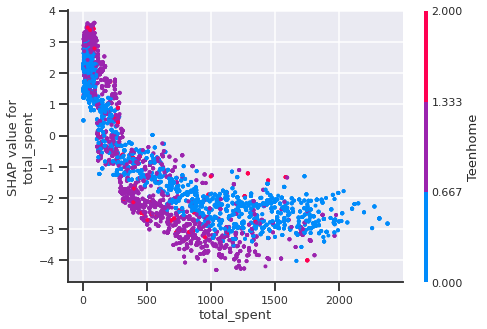

In [ ]:
shap.dependence_plot('total_spent', shap_values, X_train)

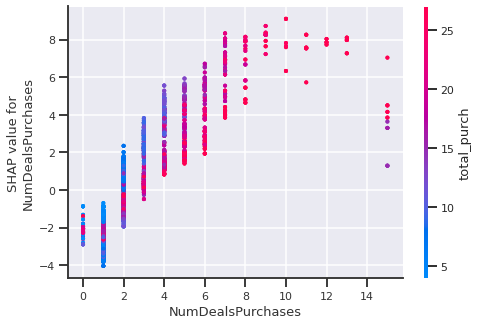

In [ ]:
shap.dependence_plot('NumDealsPurchases', shap_values, X_train)

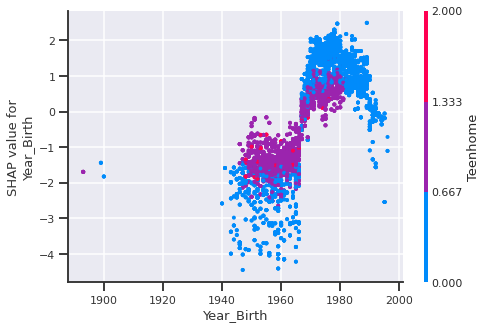

In [ ]:
shap.dependence_plot('Year_Birth', shap_values, X_train)

Shap Individual Plots

In [ ]:
#Get shap values
explainer = shap.Explainer(xgb_clf)
shap_values = explainer(X)

In [ ]:
import shap
shap.initjs()

def shap_plot(j):
    explainerModel = shap.TreeExplainer(xgb_clf)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]], link='logit')
    return(p)
    
shap_plot(2)

invalid value encountered in true_divide
invalid value encountered in true_divide


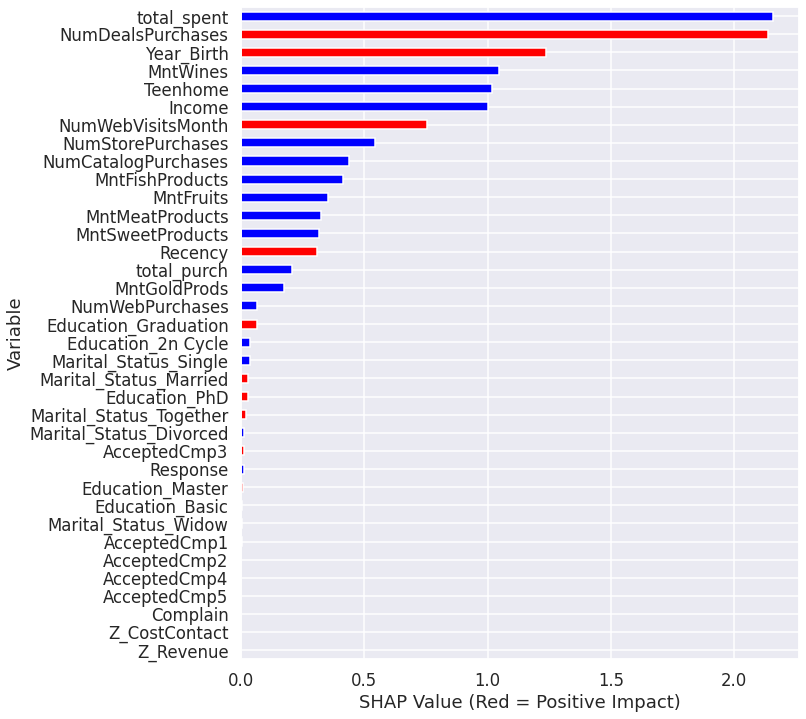

In [ ]:
## For the colored shap chart, 

def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(10,12),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X_train)

In [ ]:
# Get the predictions and put them with the test data.
X_output = X_test.copy()
# X_output.loc[:,'predict'] = np.round(xgb_clf.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,400,50) # Every 50 rows
S = X_output.iloc[random_picks]


In [ ]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(xgb_clf)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]], link='logit')
    return(p)

shap_plot(2)

#Encoding/Engineering

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import io

market = pd.read_csv('/content/drive/My Drive/market.csv')
print(market)

          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0          0        1985  Graduation        Married  70951.0        0   
1          1        1961  Graduation         Single  57091.0        0   
2          9        1975      Master         Single  46098.0        1   
3         13        1947         PhD          Widow  25358.0        0   
4         17        1971         PhD        Married  60491.0        0   
...      ...         ...         ...            ...      ...      ...   
9996   18958        1961       Basic        Married  28249.0        0   
9997   18959        1982  Graduation        Married  79908.0        0   
9998   18960        1995  Graduation         Single  34824.0        0   
9999   18961        1979  Graduation       Together  90300.0        0   
10000  18962        1971      Master         Single  33316.0        1   

       Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0             0    4/5/2013       66       239  .

In [ ]:
#Total # purchases 
market['total_spent']=market['MntWines']+market['MntMeatProducts']+market['MntSweetProducts']+market['MntGoldProds']
#Total Visits  
market['total_purch']=market['NumDealsPurchases']+market['NumWebPurchases']+market['NumCatalogPurchases']+market['NumStorePurchases']

In [ ]:
#encoding kid variable
market['Kid_home_encoded']=np.where(market['Kidhome']>0, 1, 0)

# Multiple categorical columns
categorical_cols = ['Marital_Status', 'Education']
market=pd.get_dummies(market, columns=categorical_cols)
market.dtypes


ID                           int64
Year_Birth                   int64
Income                     float64
Kidhome                      int64
Teenhome                     int64
Dt_Customer                 object
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
AcceptedCmp3                 int64
AcceptedCmp4                 int64
AcceptedCmp5                 int64
AcceptedCmp1                 int64
AcceptedCmp2                 int64
Complain                     int64
Z_CostContact                int64
Z_Revenue                    int64
Response                     int64
total_spent                  int64
total_purch         

In [ ]:
#drop Dt_customer
market.drop('Dt_Customer', axis=1, inplace=True)

In [ ]:
#drop missingincome values 
market['Income'].isna().sum()

104

In [ ]:
market.dropna(how="any", inplace=True , axis=0)


In [ ]:
market

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0,1985,70951.0,0,0,66,239,10,554,254,...,0,1,0,0,0,0,0,1,0,0
1,1,1961,57091.0,0,0,0,464,5,64,7,...,0,0,1,0,0,0,0,1,0,0
2,9,1975,46098.0,1,1,86,57,0,27,0,...,0,0,1,0,0,0,0,0,1,0
3,13,1947,25358.0,0,1,57,19,0,5,0,...,0,0,0,0,1,0,0,0,0,1
4,17,1971,60491.0,0,1,81,637,47,237,12,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,18958,1961,28249.0,0,0,80,1,9,7,2,...,0,1,0,0,0,0,1,0,0,0
9997,18959,1982,79908.0,0,0,30,557,129,761,29,...,0,1,0,0,0,0,0,1,0,0
9998,18960,1995,34824.0,0,0,65,4,2,11,2,...,0,0,1,0,0,0,0,1,0,0
9999,18961,1979,90300.0,0,0,7,594,134,786,33,...,0,0,0,1,0,0,0,1,0,0


# Scaling and Test Train Splitting


In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Load dataset

dataset = market
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())


(9897, 39)
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   9897.000000  9897.000000    9897.000000  9897.000000  9897.000000   
mean   12956.285743  1968.814489   52090.661312     0.444579     0.501162   
std     4682.250427    12.086790   24138.011049     0.535318     0.543410   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%    11461.000000  1959.000000   34968.000000     0.000000     0.000000   
50%    13962.000000  1970.000000   51287.000000     0.000000     0.000000   
75%    16461.000000  1977.000000   68462.000000     1.000000     1.000000   
max    18962.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  9897.000000  9897.000000  9897.000000      9897.000000   
mean     48.943215   303.101445    26.132565       166.872487   
std      28.904604   335.896111    39.674619       224.619073   
min       0.000000     0.000000    

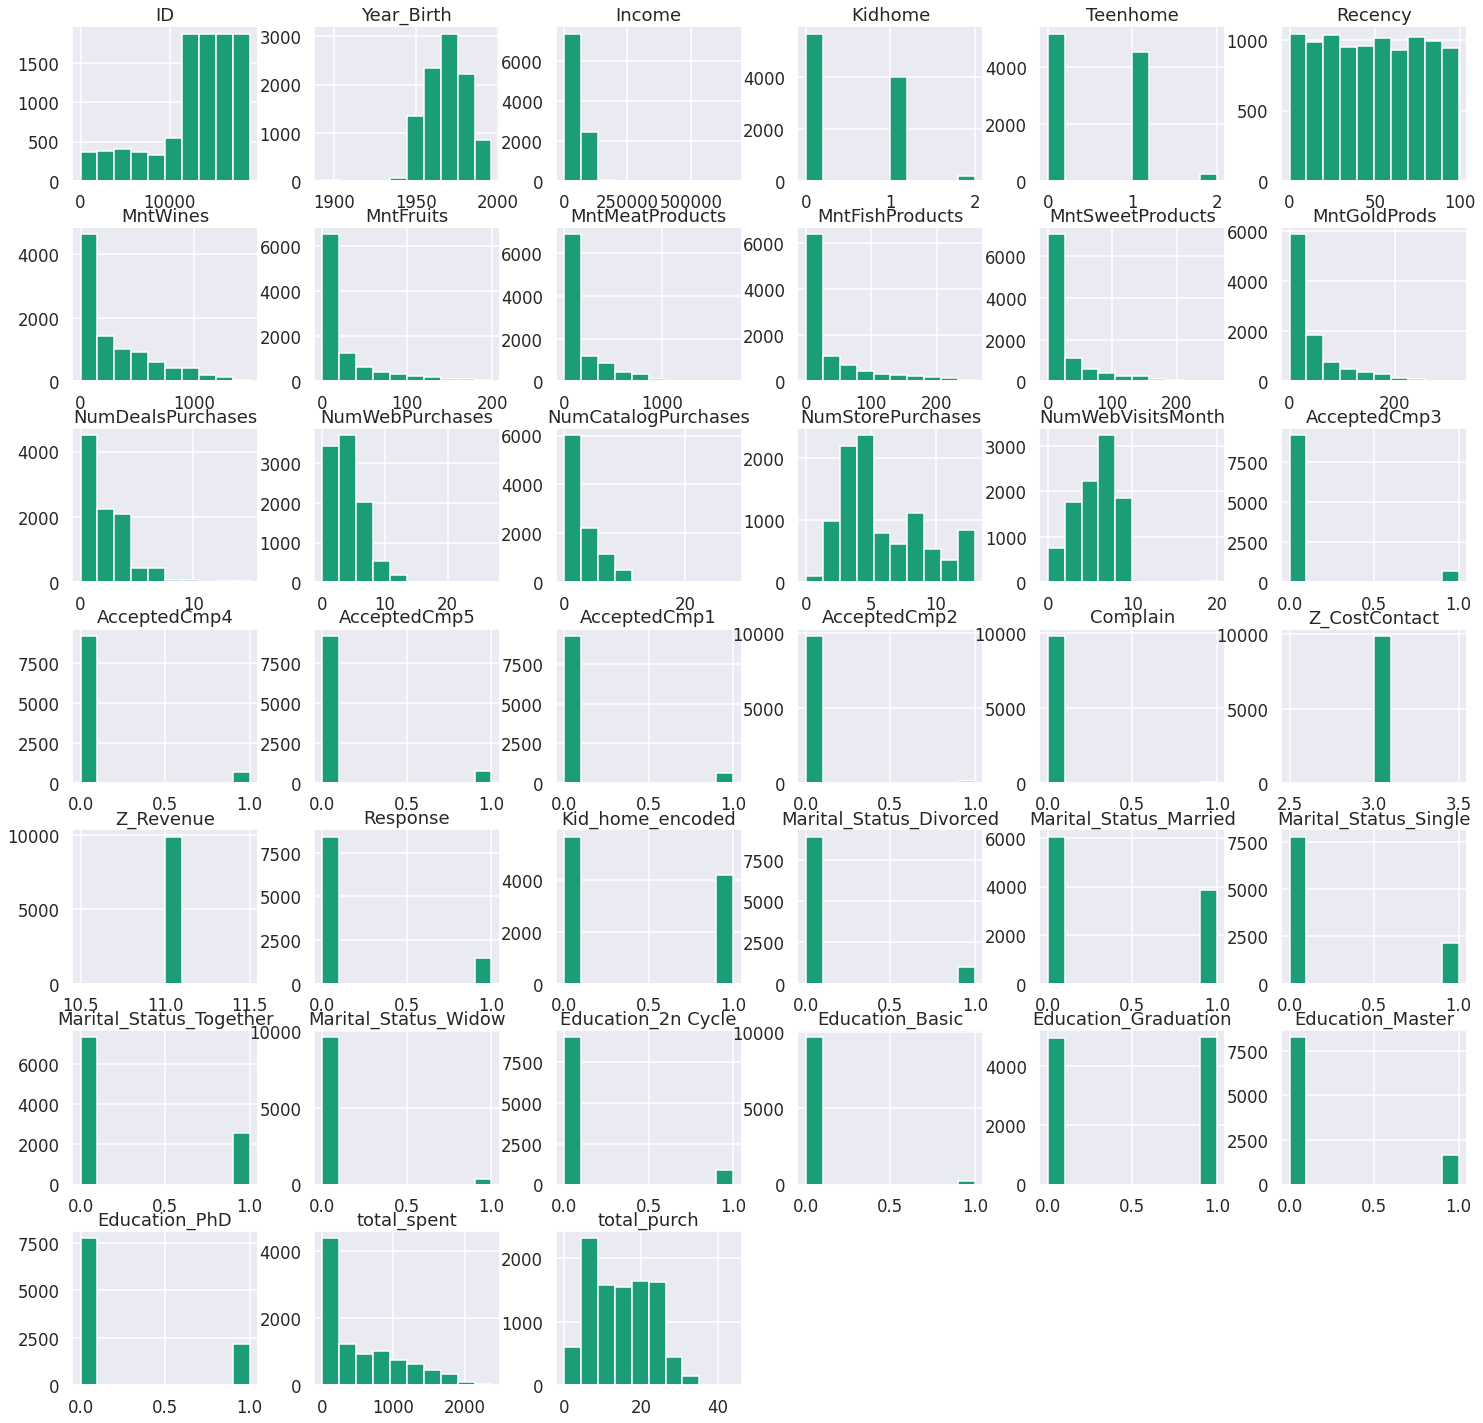

In [ ]:
# histograms of the variables
dataset.hist(figsize= (25,25))
pyplot.show()

Test/Train/Split

In [ ]:
from sklearn.model_selection import train_test_split
X = market[['Year_Birth', 'Income', 'Teenhome','Recency','MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'total_spent', 'total_purch', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single','Marital_Status_Together', 'Marital_Status_Widow', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD' ]]
y = market['Kid_home_encoded'] 

# Making train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(X_train)

X_train_normalized = mm.transform(X_train)
X_test_normalized =mm.transform(X_test)

X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns)

In [ ]:
print('x train \n')
print(X_train['AcceptedCmp1'].count())
print('y train \n')
print(y_train.count())
print('x test \n')
print(X_test['AcceptedCmp1'].count())
print('y test \n')
print(y_test.count())

x train 

7917
y train 

7917
x test 

1980
y test 

1980


#Outliers

In [ ]:
##Cap the data at 1 and 99% 
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df



In [ ]:
 cap_data(X_train_normalized)

capping the  Year_Birth
capping the  Income
capping the  Teenhome
capping the  Recency
capping the  MntWines
capping the  MntFruits
capping the  MntMeatProducts
capping the  MntFishProducts
capping the  MntSweetProducts
capping the  MntGoldProds
capping the  NumDealsPurchases
capping the  NumWebPurchases
capping the  NumCatalogPurchases
capping the  NumStorePurchases
capping the  NumWebVisitsMonth
capping the  AcceptedCmp1
capping the  AcceptedCmp2
capping the  AcceptedCmp3
capping the  AcceptedCmp4
capping the  AcceptedCmp5
capping the  Complain
capping the  Z_CostContact
capping the  Z_Revenue
capping the  Response
capping the  total_spent
capping the  total_purch
capping the  Marital_Status_Divorced
capping the  Marital_Status_Married
capping the  Marital_Status_Single
capping the  Marital_Status_Together
capping the  Marital_Status_Widow
capping the  Education_2n Cycle
capping the  Education_Basic
capping the  Education_Graduation
capping the  Education_Master
capping the  Educatio

,Year_Birth,Income,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0.689320,0.092752,1.0,0.979798,0.491628,0.130653,0.040580,0.042471,0.167939,0.052960,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.757282,0.112364,0.0,0.020202,0.494977,0.537688,0.179130,0.540541,0.305344,0.109034,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.834951,0.103178,0.0,0.757576,0.125251,0.407035,0.086377,0.096525,0.164122,0.283489,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.601942,0.067164,0.5,0.565657,0.063630,0.070352,0.037101,0.007722,0.034351,0.118380,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.747573,0.078815,0.5,0.464646,0.114534,0.000000,0.006377,0.000000,0.003817,0.062305,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,0.757282,0.118572,0.0,0.858586,0.555258,0.693467,0.249275,0.231660,0.351145,0.046729,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7913,0.786408,0.061400,0.5,0.989899,0.128600,0.025126,0.030725,0.000000,0.019084,0.046729,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7914,0.582524,0.118932,0.0,0.959596,0.515070,0.110553,0.289855,0.810811,0.545802,0.102804,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7915,0.883495,0.025954,0.0,0.434343,0.004019,0.000000,0.003478,0.007722,0.003817,0.003115,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
 cap_data(X_test_normalized)

capping the  Year_Birth
capping the  Income
capping the  Teenhome
capping the  Recency
capping the  MntWines
capping the  MntFruits
capping the  MntMeatProducts
capping the  MntFishProducts
capping the  MntSweetProducts
capping the  MntGoldProds
capping the  NumDealsPurchases
capping the  NumWebPurchases
capping the  NumCatalogPurchases
capping the  NumStorePurchases
capping the  NumWebVisitsMonth
capping the  AcceptedCmp1
capping the  AcceptedCmp2
capping the  AcceptedCmp3
capping the  AcceptedCmp4
capping the  AcceptedCmp5
capping the  Complain
capping the  Z_CostContact
capping the  Z_Revenue
capping the  Response
capping the  total_spent
capping the  total_purch
capping the  Marital_Status_Divorced
capping the  Marital_Status_Married
capping the  Marital_Status_Single
capping the  Marital_Status_Together
capping the  Marital_Status_Widow
capping the  Education_2n Cycle
capping the  Education_Basic
capping the  Education_Graduation
capping the  Education_Master
capping the  Educatio

,Year_Birth,Income,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0.766990,0.029520,0.0,0.010101,0.008038,0.010050,0.009855,0.023166,0.003817,0.031153,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.631068,0.117351,0.5,0.323232,0.277964,0.025126,0.071884,0.057915,0.133588,0.034268,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.805825,0.027747,0.0,0.272727,0.012056,0.211055,0.013913,0.057915,0.076336,0.056075,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.543689,0.085538,0.5,0.636364,0.580710,0.000000,0.049855,0.000000,0.000000,0.059190,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.815534,0.031538,0.0,0.020202,0.001340,0.020101,0.005217,0.000000,0.015267,0.015576,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,0.883495,0.117120,0.0,0.373737,0.301407,0.668342,0.537449,0.667954,0.000000,0.672897,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1976,0.825243,0.083291,0.5,0.454545,0.121902,0.020101,0.019130,0.000000,0.007634,0.130841,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1977,0.582524,0.077997,0.5,0.606061,0.233758,0.020101,0.045217,0.023166,0.000000,0.133956,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1978,0.533981,0.065182,1.0,0.747475,0.096450,0.010050,0.057391,0.027027,0.007634,0.093458,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Exporting Final Data and Distributions


In [ ]:
final_data=X_test_normalized.append(X_train_normalized)

In [ ]:
final_data.isna().sum()

Year_Birth                 0
Income                     0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp1               0
AcceptedCmp2               0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
total_spent                0
total_purch                0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Education_2n Cycle         0
Education_Basic            0
Education_Graduation       0
Education_Mast

In [ ]:
y_final=y_train.append(y_test)
y_final

1682    0
1429    1
4192    0
6543    0
6256    0
       ..
6695    0
7293    1
4597    1
8593    1
1484    0
Name: Kid_home_encoded, Length: 9897, dtype: int64

In [ ]:
final_data['Kid_home_encoded']=y_final
final_data

,Year_Birth,Income,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Kid_home_encoded
0,0.766990,0.029520,0.0,0.010101,0.008038,0.010050,0.009855,0.023166,0.003817,0.031153,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.631068,0.117351,0.5,0.323232,0.277964,0.025126,0.071884,0.057915,0.133588,0.034268,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.805825,0.027747,0.0,0.272727,0.012056,0.211055,0.013913,0.057915,0.076336,0.056075,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.543689,0.085538,0.5,0.636364,0.580710,0.000000,0.049855,0.000000,0.000000,0.059190,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.815534,0.031538,0.0,0.020202,0.001340,0.020101,0.005217,0.000000,0.015267,0.015576,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,0.757282,0.118572,0.0,0.858586,0.555258,0.693467,0.249275,0.231660,0.351145,0.046729,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7913,0.786408,0.061400,0.5,0.989899,0.128600,0.025126,0.030725,0.000000,0.019084,0.046729,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7914,0.582524,0.118932,0.0,0.959596,0.515070,0.110553,0.289855,0.810811,0.545802,0.102804,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7915,0.883495,0.025954,0.0,0.434343,0.004019,0.000000,0.003478,0.007722,0.003817,0.003115,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
final=getPercentile(final_data)
final

,Attribute Name,P1,P5,P10,P90,P95,P99,Median,Mean,STD,missing
0,Year_Birth,0.504854,0.543689,0.572816,0.883495,0.922330,0.961165,0.736846,0.747573,0.113483,0
0,Income,0.008678,0.025866,0.033456,0.117412,0.124056,0.138009,0.075128,0.074529,0.031261,0
0,Teenhome,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,0.250581,0.000000,0.271691,0
0,Recency,0.000000,0.040404,0.090909,0.898990,0.949495,0.989899,0.494303,0.494949,0.291827,0
0,MntWines,0.000670,0.002009,0.004019,0.547220,0.669792,0.856343,0.202359,0.115874,0.222873,0
0,MntFruits,0.000000,0.000000,0.000000,0.417085,0.603015,0.864322,0.130587,0.040201,0.196468,0
0,MntMeatProducts,0.001159,0.002319,0.004058,0.289507,0.399420,0.530435,0.095858,0.038261,0.125884,0
0,MntFishProducts,0.000000,0.000000,0.000000,0.474903,0.667954,0.876448,0.145563,0.046332,0.211809,0
0,MntSweetProducts,0.000000,0.000000,0.000000,0.335878,0.477099,0.664924,0.101473,0.030534,0.153186,0
0,MntGoldProds,0.000000,0.003115,0.009346,0.380062,0.517134,0.707165,0.135942,0.074766,0.160298,0


In [ ]:
final.to_csv('final_data.csv') 

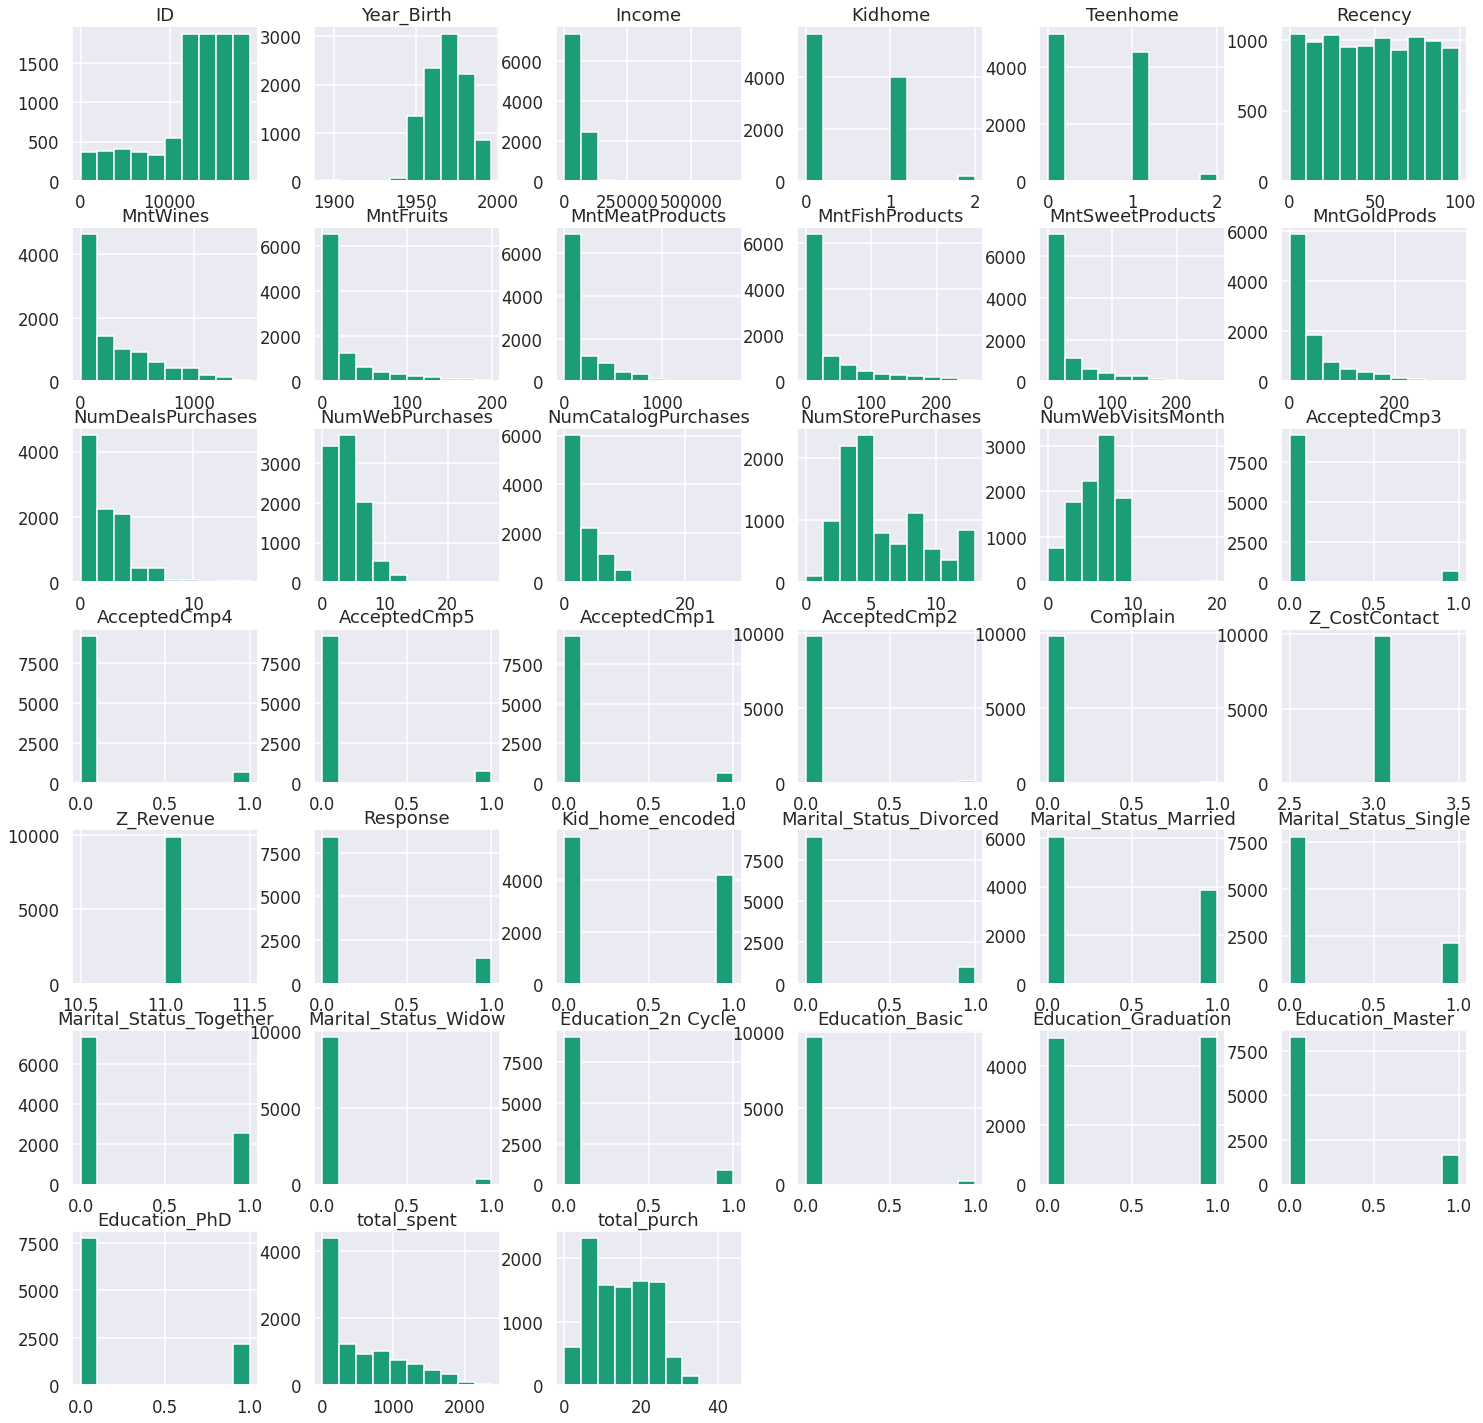

In [ ]:
# histograms of the variables
dataset.hist(figsize=(25,25))
pyplot.show()

In [ ]:
import numpy as np
import pandas as pd 

def getPercentile(df):
  result = pd.DataFrame()
  for name in df:
    missing = df[name].isna().sum()
    
    #df[name]/df[name]? for volume: volume/volume? 
    p1 = df[name].quantile(.01)
    p5 = df[name].quantile(.05)
    p10 = df[name].quantile(.1)
    p90 = df[name].quantile(.9)
    p95 = df[name].quantile(.95)
    p99 = df[name].quantile(.99)
    median = np.mean(df[name])
    mean = np.median(df[name])
    sd = np.std(df[name])
    data = [[name,p1,p5,p10,p90,p95,p99,median,mean,sd, missing]]
    temp = pd.DataFrame(data, columns = ['Attribute Name','P1','P5', 'P10','P90','P95','P99','Median','Mean','STD', 'missing'])
    result = result.append(temp)
  return result


In [ ]:
finaldata=getPercentile(dataset)
finaldata

,Attribute Name,P1,P5,P10,P90,P95,P99,Median,Mean,STD,missing
0,ID,519.32,2539.8,4962.8,17961.4,18462.2,18862.04,12956.285743,13962.0,4682.013872,0
0,Year_Birth,1945.00,1949.0,1952.0,1984.0,1988.0,1992.00,1968.814489,1970.0,12.086179,0
0,Income,7500.00,18929.0,23976.0,79801.2,84219.0,94871.00,52090.661312,51287.0,24136.791557,0
0,Kidhome,0.00,0.0,0.0,1.0,1.0,2.00,0.444579,0.0,0.535291,0
0,Teenhome,0.00,0.0,0.0,1.0,1.0,2.00,0.501162,0.0,0.543383,0
0,Recency,0.00,4.0,9.0,89.0,94.0,98.00,48.943215,49.0,28.903144,0
0,MntWines,1.00,3.0,6.0,817.0,1000.0,1285.00,303.101445,173.0,335.879141,0
0,MntFruits,0.00,0.0,0.0,83.0,120.0,172.00,26.132565,8.0,39.672615,0
0,MntMeatProducts,2.00,4.0,7.0,499.4,689.0,915.00,166.872487,66.0,224.607725,0
0,MntFishProducts,0.00,0.0,0.0,123.0,173.0,227.00,37.862888,12.0,55.450756,0


In [ ]:
finaldata.to_csv('final_data.csv') 

# Neural Network

In [ ]:
pip install tensorflow

     |████████████████████████████████| 462 kB 5.1 MB/s 


In [ ]:
##Scorer metrics
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
pip install keras

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense
from keras.layers import Dense

In [ ]:
# We build a NN with two hidden layers, and 6 nodes in each hidden layer.

# first step: create a Sequential object, as a sequence of layers. B/C NN is a sequence of layers.
classifier = Sequential()

# add the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation = 'relu'))

# add the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation = 'relu'))

# add the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform', activation = 'sigmoid'))

# add additional parameters
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'FalseNegatives'])

# train the model
classifier.fit(X_train_normalized,y_train,batch_size=1000,epochs=20)


Epoch 1/20


InvalidArgumentError: ignored

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, classifier.predict(X_test_normalized))

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, classifier.predict(X_train_normalized))

NameError: ignored

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, classifier.predict(X_train_normalized))

0.8673063895570101

# NN Grid Search

Having an issue getting grid search and NN with AUC

In [ ]:
##Scorer metrics
import sklearn
sklearn.metrics.SCORERS.keys()

#activation options
#activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
def auc_roc(y_true, y_pred):
    # can be any tensorflow metric
    value, update_op = tf.contrib.metrics.streaming_auc(y_pred, y_true)
    # find all variables created for this metric
    metric_vars = [i for i in tf.local_variables() if 'auc_roc' in i.name.split('/')[1]]
    
    # Add metric variables to GLOBAL_VARIABLES collection.
    # They will be initialized for new session.
    for v in metric_vars:
        tf.add_to_collection(tf.GraphKeys.GLOBAL_VARIABLES, v)
    
    # force to update metric values
    with tf.control_dependencies([update_op]):
        value = tf.identity(value)
    return value

In [ ]:
# Use scikit-learn to grid search the activation function
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(12, kernel_initializer='uniform', activation=activation))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
#seed = 7
#numpy.random.seed(seed)
# load dataset

# split into input (X) and output (Y) variables

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=1)

print("ROC: ", np.round(roc_auc_score(y_true, y_pred), 5))
# define the grid search parameters
#activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
activation = [ 'softplus', 'sigmoid']
batch_size=[10,50]
param_grid = dict(activation=activation,batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_normalized, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ROC:  0.99866


KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5723
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5766
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5766
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5766
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5766
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5766
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5766
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5766
Epoch 9/100
800/800 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5766
Epoch 10/100
800/800 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5766
Epoch 11/100
800/80

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV 
def create_model(optimizer='adam', units=4, activation = 'relu', hidden_layers=1):
  # Initialize the constructor
  model = Sequential()
  # Add an input layer
  model.add(Dense(units, kernel_initializer='uniform', activation=activation))

  for i in range(hidden_layers):
      # Add one hidden layer
      for i in range(units):
        model.add(Dense(units=units, activation=activation))

  # Add an output layer 
  model.add(Dense(1, activation=activation))
  #compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, epochs=75, batch_size=15, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


This one! Works with AUC too!

In [ ]:
from sklearn.metrics import roc_auc_score, auc, accuracy_score, confusion_matrix, mean_squared_error, classification_report, confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV 
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.python.keras.layers import Input, Dense
from keras.models import Sequential

def create_model(optimizer='adam', units=4, activation = 'relu', hidden_layers=1):
  # Initialize the constructor
  model = Sequential()
  # Add an input layer
  model.add(Dense(units, kernel_initializer='uniform', activation=activation))
  for i in range(hidden_layers):
      # Add one hidden layer
      for i in range(units):
        model.add(Dense(units=units, activation=activation))
  # Add an output layer 
  model.add(Dense(1, activation='sigmoid'))
  #compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[ tf.keras.metrics.AUC()])
  return model
model = KerasClassifier(build_fn=create_model, epochs=75, batch_size=15, verbose=1)
# define the grid search parameters
activation = [ 'softplus', 'sigmoid']
units=[5,10]
hidden_layers=[2,5]
#activation=activation, 

param_grid = dict(hidden_layers=hidden_layers, units=units, activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring='roc_auc', n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_normalized, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/75
528/528 [==============================] - 5s 5ms/step - loss: 0.5673 - auc_25: 0.7610
Epoch 2/75
528/528 [==============================] - 2s 5ms/step - loss: 0.4036 - auc_25: 0.8922
Epoch 3/75
528/528 [==============================] - 2s 4ms/step - loss: 0.3685 - auc_25: 0.9126
Epoch 4/75
528/528 [==============================] - 2s 4ms/step - loss: 0.3523 - auc_25: 0.9206
Epoch 5/75
528/528 [==============================] - 2s 5ms/step - loss: 0.3462 - auc_25: 0.9232
Epoch 6/75
528/528 [==============================] - 2s 4ms/step - loss: 0.3435 - auc_25: 0.9247
Epoch 7/75
528/528 [==============================] - 2s 5ms/step - loss: 0.3346 - auc_25: 0.9288
Epoch 8/75
528/528 [==============================] - 2s 4ms/step - loss: 0.3404 - auc_25: 0.9257
Epoch 9/75
528/528 [==============================] - 2s 5ms/step - loss: 0.3329 - auc_25: 0.9293
Epoch 10/75
528/528 [==============================] - 2s 4ms/step - loss: 0.3316 - auc_25: 0.9297
Epoch 11/75
528/528

In [ ]:
 results = pd.DataFrame(grid_result.cv_results_)
results.to_csv('grid_results.csv', index=False)

In [ ]:
# View hyperparameters of best neural network
grid_result.best_params_

{'activation': 'softplus', 'hidden_layers': 2, 'units': 10}

10-fold Cross Validation

In [ ]:
from sklearn.metrics import roc_auc_score, auc, accuracy_score, confusion_matrix, mean_squared_error, classification_report, confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV 
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.python.keras.layers import Input, Dense
from keras.models import Sequential

In [ ]:
def create_model(optimizer='adam', units=4, activation = 'relu', hidden_layers=1):
  # Initialize the constructor
  model = Sequential()
  # Add an input layer
  model.add(Dense(units=10, kernel_initializer='uniform', activation='softplus'))
  model.add(Dense(units=10, activation='softplus'))
  model.add(Dense(units=10, activation='softplus'))
  # Add an output layer 
  model.add(Dense(1, activation='sigmoid'))
  #compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[ tf.keras.metrics.AUC()])
  return model
model = KerasClassifier(build_fn=create_model, epochs=75, batch_size=15, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [ ]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [ ]:
scores

array([0.5       , 0.5       , 0.90990268, 0.50113379, 0.5       ,
       0.92738765, 0.50240385, 0.50088183, 0.50229358, 0.87612588])

# Linear Model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0,'/content/drive/My Drive/cleands.py')

In [ ]:
#Load Data again
import pandas as pd
import numpy as np
import io
 
market = pd.read_csv('/content/drive/My Drive/market.csv')
print(market)


          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0          0        1985  Graduation        Married  70951.0        0   
1          1        1961  Graduation         Single  57091.0        0   
2          9        1975      Master         Single  46098.0        1   
3         13        1947         PhD          Widow  25358.0        0   
4         17        1971         PhD        Married  60491.0        0   
...      ...         ...         ...            ...      ...      ...   
9996   18958        1961       Basic        Married  28249.0        0   
9997   18959        1982  Graduation        Married  79908.0        0   
9998   18960        1995  Graduation         Single  34824.0        0   
9999   18961        1979  Graduation       Together  90300.0        0   
10000  18962        1971      Master         Single  33316.0        1   

       Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0             0    4/5/2013       66       239  .

Re-encoding variables

In [ ]:
#encoding kid variable
market['Kid_home_encoded']=np.where(market['Kidhome']>0, 1, 0)

# Multiple categorical columns
categorical_cols = ['Marital_Status', 'Education']
market=pd.get_dummies(market, columns=categorical_cols)
#Total # purchases 
market['total_spent']=market['MntWines']+market['MntMeatProducts']+market['MntSweetProducts']+market['MntGoldProds']
#Total Visits  
market['total_purch']=market['NumDealsPurchases']+market['NumWebPurchases']+market['NumCatalogPurchases']+market['NumStorePurchases']
##Drop missing Income values
market.dropna(how="any", inplace=True , axis=0)

Splitting and normalizing


In [ ]:
from sklearn.model_selection import train_test_split

X = market[['Year_Birth', 'Income', 'Teenhome','Recency','MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'total_spent', 'total_purch', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single','Marital_Status_Together', 'Marital_Status_Widow', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD']]
y = market['Kid_home_encoded'] 

In [ ]:
# Making train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(X_train)

X_train_normalized = mm.transform(X_train)
X_test_normalized =mm.transform(X_test)

X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns)

In [ ]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


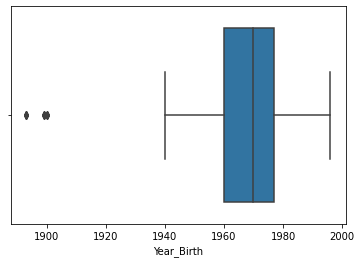

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(X_train['Year_Birth'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


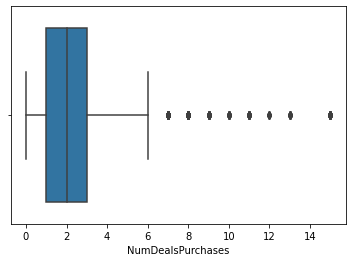

In [ ]:
sns.boxplot(X_train['NumDealsPurchases'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


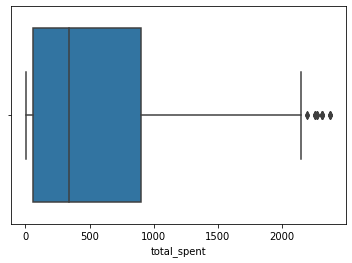

In [ ]:
sns.boxplot(X_train['total_spent'])

Do not use Outlier Capping for linear modeling, AUC is 82 with capping, 92 with no capping

In [ ]:
##Cap the data at 1 and 99% 
def cap_data(df):
     for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

cap_data(X_train_normalized)
cap_data(X_test_normalized)

In [ ]:

# importing libraries
import statsmodels.api as sm
y=y_train
y = list(y)
X=X_train_normalized[['Year_Birth', 'NumDealsPurchases','total_spent']]
# building the model and fitting the data
log_reg = sm.Logit(y, X).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.414952
         Iterations 8


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7917
Model:                          Logit   Df Residuals:                     7914
Method:                           MLE   Df Model:                            2
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.3920
Time:                        16:09:58   Log-Likelihood:                -3285.2
converged:                       True   LL-Null:                       -5403.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year_Birth            0.6716      0.065     10.265      0.000       0.543       0.800
NumDealsPurchases     6.6623      0.288     23.106      0.000       6.097       7.227
total_spent         -11.

In [ ]:
Xtest=X_test_normalized[['Year_Birth', 'NumDealsPurchases','total_spent']]

In [ ]:
from sklearn.metrics import roc_auc_score
y_pred = log_reg.predict(Xtest) # Predictions
y_true = y_test # True values
print("ROC: ", np.round(roc_auc_score(y_true, y_pred), 5))

ROC:  0.92778


# XGBoost Continuous- Predict Amount Spent (just for fun) 


In [ ]:

import pandas as pd
import io
 
market = pd.read_csv('/content/drive/My Drive/market.csv')
print(market)

In [ ]:
#Encode Categorical
cleanup_nums = {"Education":{"Graduation": 1, "Basic": 2, "Master":3, "2n Cycle": 4, "PhD": 5},
                 "Marital_Status":{"Married": 1, "Together": 2, "Single":3, "Divorced": 4, "Widow":5}}
market = market.replace(cleanup_nums)
market

In [ ]:
#Total Visits  
market['total_purch']=market['NumDealsPurchases']+market['NumWebPurchases']+market['NumCatalogPurchases']+market['NumStorePurchases']

#Total # purchases 
market['total_spent']=market['MntWines']+market['MntMeatProducts']+market['MntSweetProducts']+market['MntGoldProds']


[00:05:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

RMSE:  32.94

R-Squared:  1.0

Prediction Error Plot


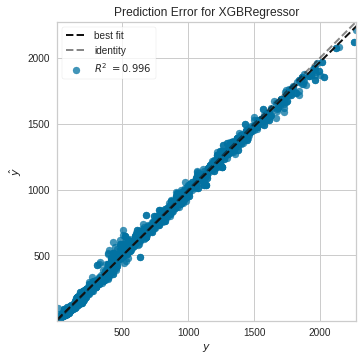

PredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff10430aa50>,
                estimator=XGBRegressor(learning_rate=0.05, n_jobs=2,
                                       objectvie='reg:squarederror',
                                       random_state=42))

Residuals Plot


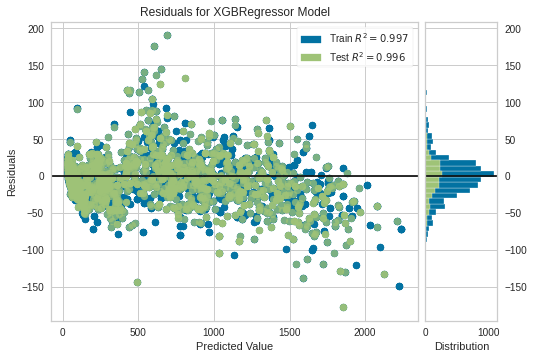

AttributeError: ignored

In [ ]:
# Import libraries with standard conventions
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

data = market # Loading the data


X = market[['Kidhome', 'Year_Birth','Income', 'Recency','MntWines', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'total_purch']]
y = market['total_spent'] # Target vector in pd.Series format


# Making train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, shuffle=True)

# Instantiate an XGBoost object with hyperparameters
xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)

# Train the model with train data sets
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test) # Predictions
y_true = y_test # True values

MSE = mse(y_true, y_pred)
RMSE = np.sqrt(MSE)

R_squared = r2_score(y_true, y_pred)

print("\nRMSE: ", np.round(RMSE, 2))
print()
print("R-Squared: ", np.round(R_squared, 2))

# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(xgb_reg, X_train, y_train, X_test, y_test))

# Making the Residuals Plot
print("\nResiduals Plot")
print(residuals_plot(xgb_reg, X_train, y_train, X_test, y_test))

L2 Regularization

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = market # Loading the data


X = market[['Kidhome', 'Year_Birth','Income', 'Recency','MntWines', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'total_purch']]
y = market['total_spent'] # Target vector in pd.Series format


# Making train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, shuffle=True)
lambda_values = [1, 10, 50, 100]
for val in lambda_values:
    xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05, reg_lambda=val)


    xgb_reg.fit(X_train, y_train)

    y_pred = xgb_reg.predict(X_test)
    y_true = y_test

    MSE = mse(y_true, y_pred)
    RMSE = np.sqrt(MSE)

    R_squared = r2_score(y_true, y_pred)

    print("lambda = ", val)
    print("RMSE: ", np.round(RMSE, 2))
    print("R-Squared: ", np.round(R_squared, 2))
    print()

[00:07:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
lambda =  1
RMSE:  32.94
R-Squared:  1.0

[00:07:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
lambda =  10
RMSE:  34.03
R-Squared:  1.0

[00:07:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
lambda =  50
RMSE:  43.2
R-Squared:  0.99

[00:07:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
lambda =  100
RMSE:  49.41
R-Squared:  0.99

